In [739]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
from collections import Counter


In [740]:
#import data
data = pd.read_csv('./databygenres.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


In [741]:
#Check for missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total  Percent
genres                0      0.0
acousticness          0      0.0
danceability          0      0.0
duration_ms           0      0.0
energy                0      0.0
instrumentalness      0      0.0

In [742]:
data.tail()

genres  acousticness  danceability    duration_ms    energy  \
3227  zim urban groove      0.003910      0.553000   42672.000000  0.942000   
3228              zolo      0.208648      0.533837  264101.612142  0.620470   
3229              zouk      0.272928      0.641889  441641.777778  0.695778   
3230      zurich indie      0.993000      0.705667  198417.333333  0.172667   
3231            zydeco      0.381496      0.625963  184088.078095  0.572417   

      instrumentalness  liveness   loudness  speechiness       tempo  \
3227          0.961000  0.113000  -8.004000     0.039900  134.995000   
3228          0.163334  0.201430 -10.878906     0.061828  126.765194   
3229          0.257604  0.166011  -9.518889     0.050511  105.848889   
3230          0.468633  0.179667 -11.453333     0.348667   91.278000   
3231          0.019234  0.262545 -10.643750     0.072440  130.137242   

       valence  popularity  key  mode  
3227  0.752000    9.000000    7     1  
3228  0.576721   31.108254    9     1  
3229  0.878444   32.555556    7     1  
3230  0.739000    0.000000    7     0  
3231  0.792174   27.703810    9     1

In [743]:
#correlation for numeric data
data[['genres','acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness','liveness',
      'loudness','speechiness','tempo','valence','popularity','key','mode']].corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.313905    -0.087727 -0.869606   
danceability         -0.313905      1.000000    -0.045795  0.281404   
duration_ms          -0.087727     -0.045795     1.000000  0.014236   
energy               -0.869606      0.281404     0.014236  1.000000   
instrumentalness      0.088735     -0.244617     0.254552 -0.154197   
liveness             -0.086465     -0.174051    -0.010243  0.193163   
loudness             -0.727258      0.413898    -0.090775  0.842509   
speechiness          -0.046420      0.219735    -0.022794  0.088189   
tempo                -0.412295      0.140094     0.002845  0.428856   
valence              -0.107280      0.586904    -0.242138  0.228205   
popularity           -0.147686      0.095875    -0.140134  0.077118   
key                  -0.053626      0.049791    -0.003217  0.051512   
mode                  0.108488     -0.119129    -0.025315 -0.108541   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
acousticness              0.088735 -0.086465 -0.727258    -0.046420 -0.412295   
danceability             -0.244617 -0.174051  0.413898     0.219735  0.140094   
duration_ms               0.254552 -0.010243 -0.090775    -0.022794  0.002845   
energy                   -0.154197  0.193163  0.842509     0.088189  0.428856   
instrumentalness          1.000000 -0.064651 -0.405030    -0.183492 -0.061999   
liveness                 -0.064651  1.000000  0.148566     0.177949  0.003905   
loudness                 -0.405030  0.148566  1.000000     0.064439  0.393310   
speechiness              -0.183492  0.177949  0.064439     1.000000  0.013008   
tempo                    -0.061999  0.003905  0.393310     0.013008  1.000000   
valence                  -0.439943 -0.048904  0.344053     0.083281  0.117167   
popularity               -0.371217 -0.123948  0.139686    -0.044125  0.021074   
key                      -0.023894  0.006985  0.047599    -0.001096  0.056062   
mode                     -0.038955  0.024911 -0.089683    -0.029173 -0.044488   

                   valence  popularity       key      mode  
acousticness     -0.107280   -0.147686 -0.053626  0.108488  
danceability      0.586904    0.095875  0.049791 -0.119129  
duration_ms      -0.242138   -0.140134 -0.003217 -0.025315  
energy            0.228205    0.077118  0.051512 -0.108541  
instrumentalness -0.439943   -0.371217 -0.023894 -0.038955  
liveness         -0.048904   -0.123948  0.006985  0.024911  
loudness          0.344053    0.139686  0.047599 -0.089683  
speechiness       0.083281   -0.044125 -0.001096 -0.029173  
tempo             0.117167    0.021074  0.056062 -0.044488  
valence           1.000000    0.149177  0.054124 -0.013769  
popularity        0.149177    1.000000 -0.015494  0.037161  
key               0.054124   -0.015494  1.000000 -0.112145  
mode             -0.013769    0.037161 -0.112145  1.000000

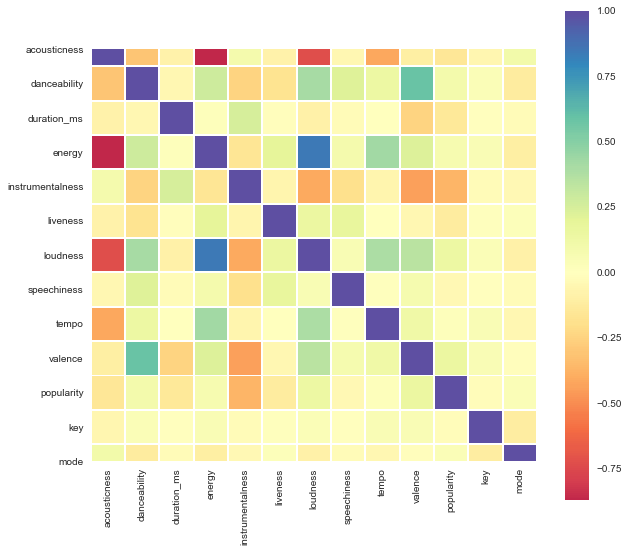

In [744]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[['genres','acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness','liveness','loudness',
                  'speechiness','tempo','valence','popularity','key','mode']].corr(), vmax= 1.0, center=0, cmap='Spectral',
                   square=True, linewidths=.9, cbar_kws={'shrink':.9})

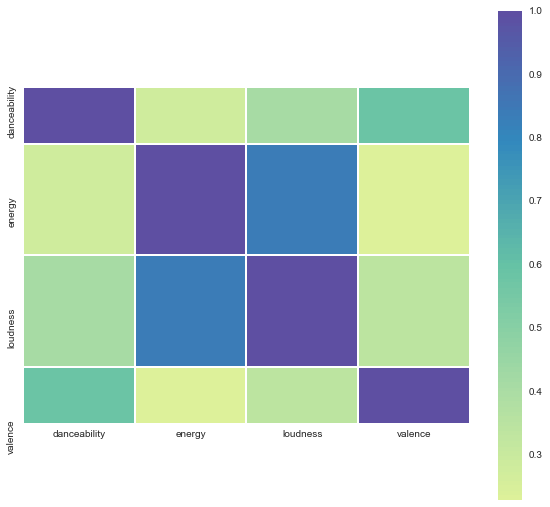

In [745]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[['danceability','energy','loudness', 'valence']].corr(), vmax= 1.0, center=0, cmap='Spectral', square=True, linewidths=.9,
           cbar_kws={'shrink':.9})

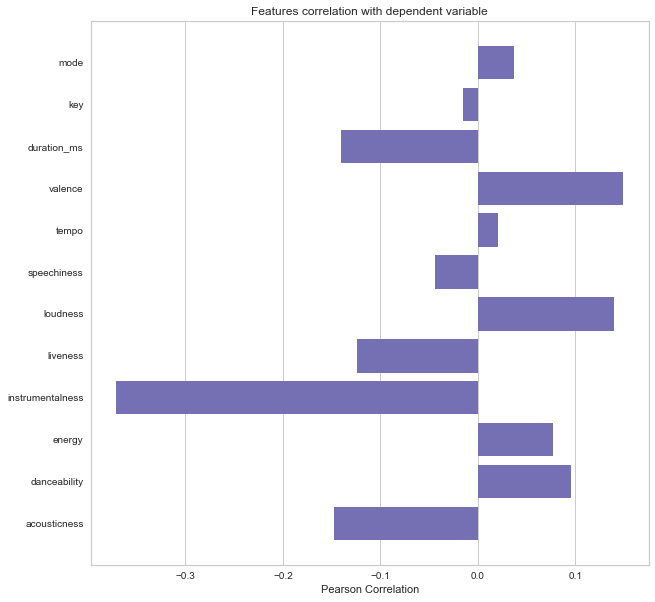

In [746]:
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from yellowbrick.style import set_palette

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)
set_palette('dark')
plt.rcParams['figure.figsize']=(10,10)
# Fit the data to the visualizer
visualizer.fit(X, y)    
visualizer.show()

In [747]:
genre_names_text = " ".join(data['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(20)])
print(most_common_words_in_genres_df['word'])
#print(genre_names_text)

0           pop
1         indie
2          rock
3         metal
4     classical
5           hop
6           hip
7          jazz
8          folk
9          punk
10         deep
11        house
12          rap
13      classic
14      italian
15     japanese
16        piano
17       german
18      swedish
19       techno
Name: word, dtype: object


In [766]:
#!pip install autoviz
#!pip install xlrd

In [767]:
from autoviz.AutoViz_Class import AutoViz_Class
auto_viz = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (3232, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 66


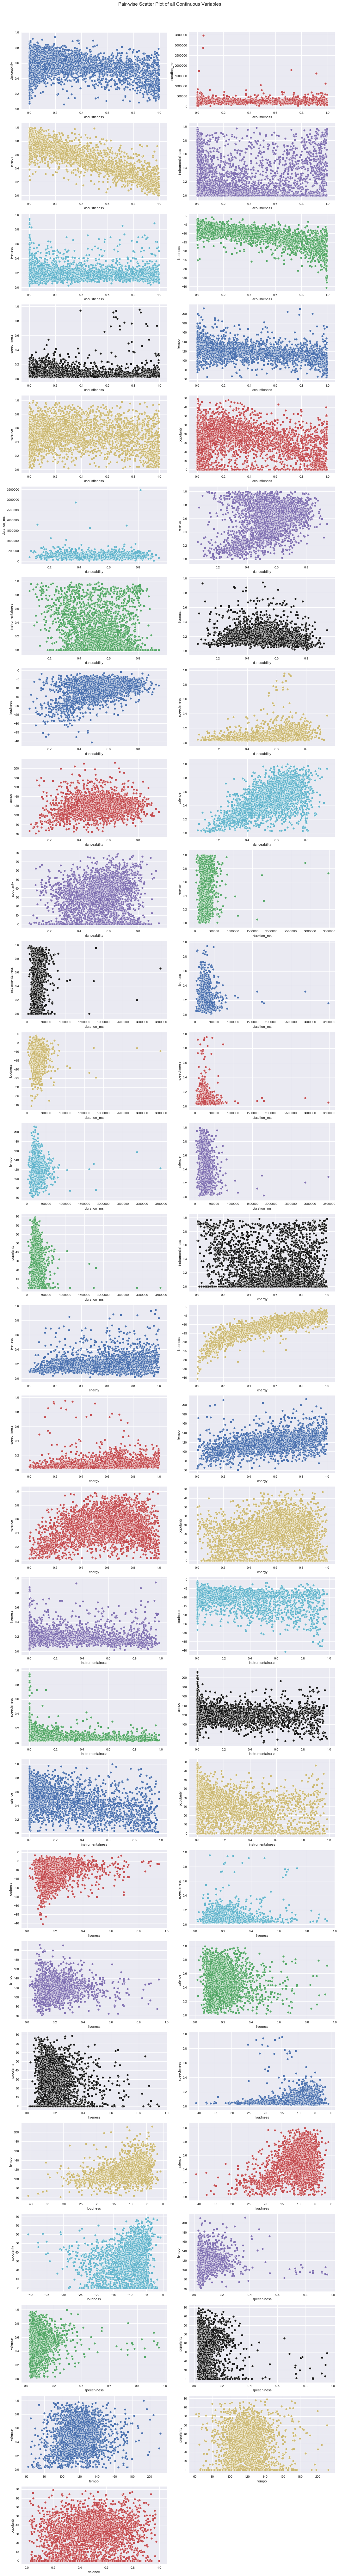

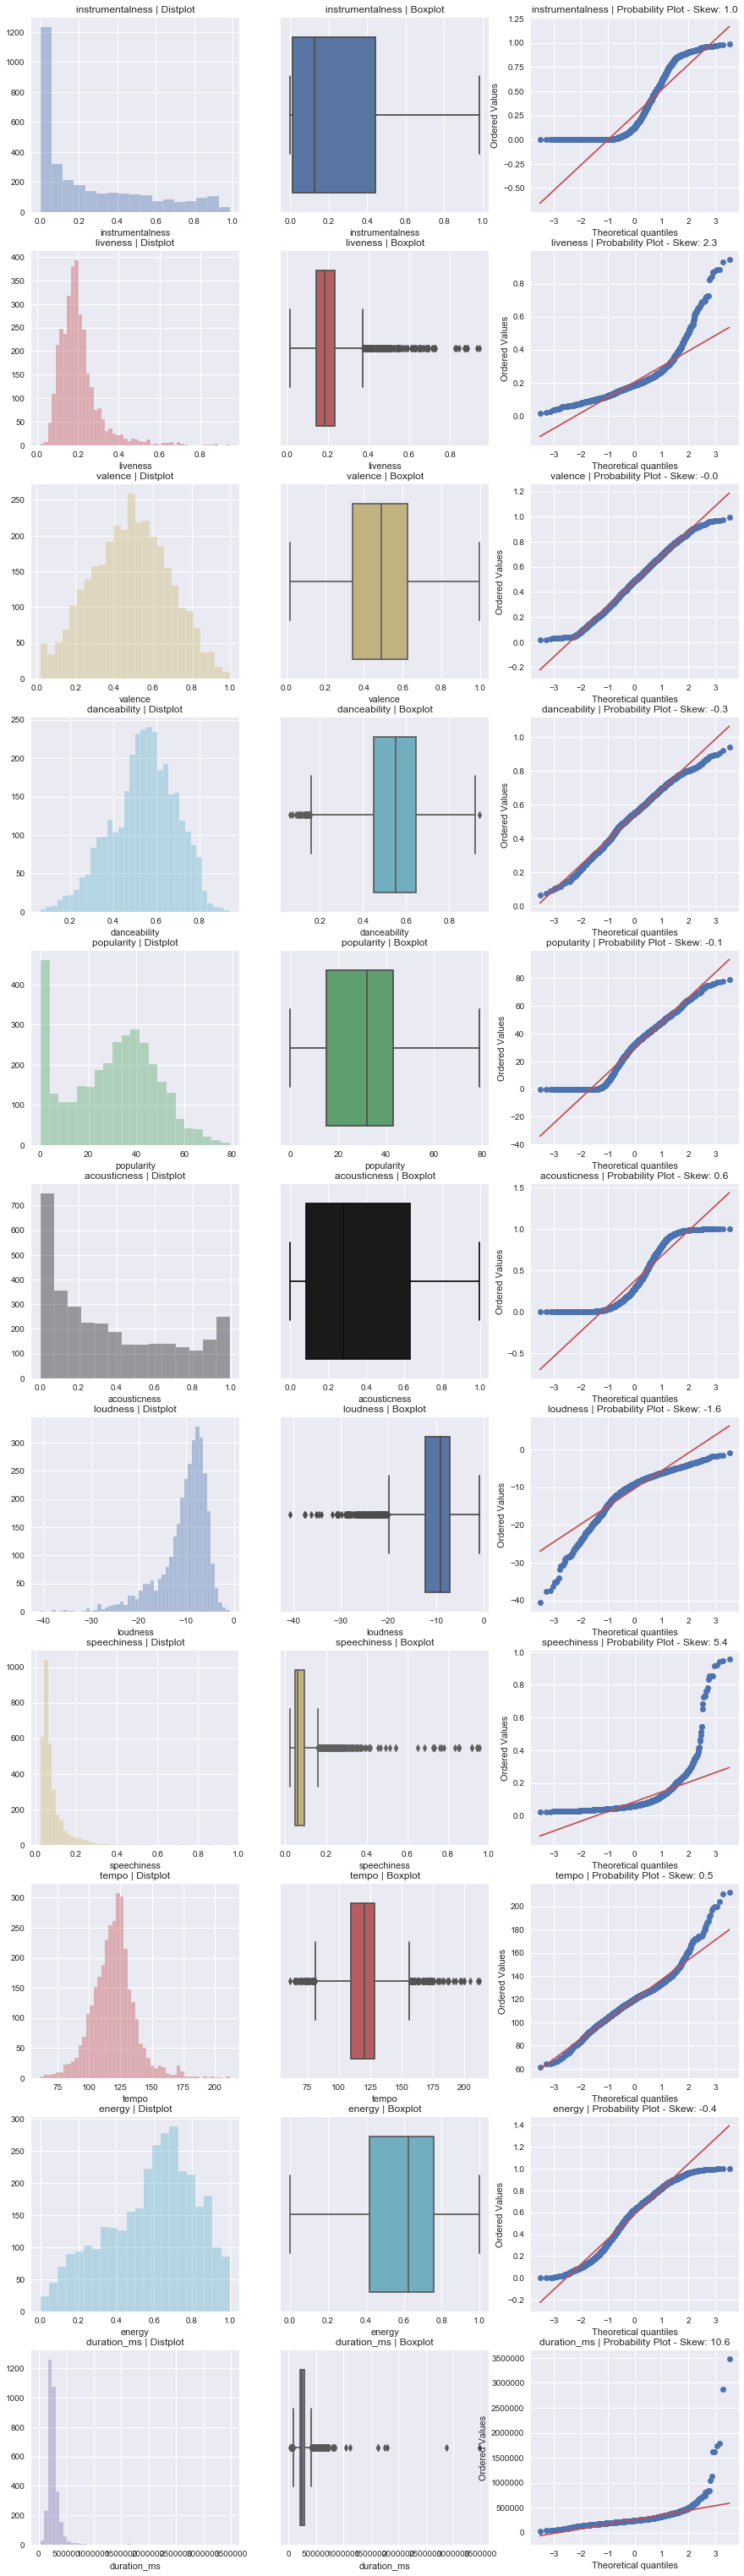

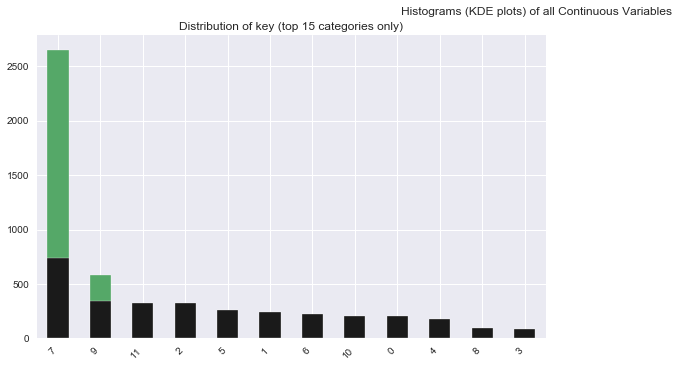

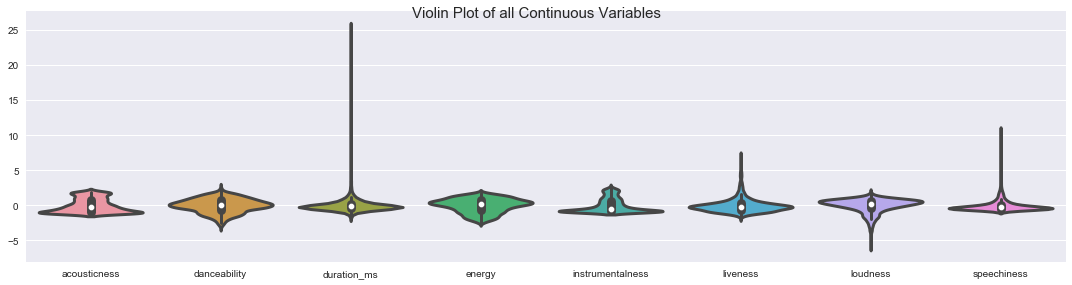

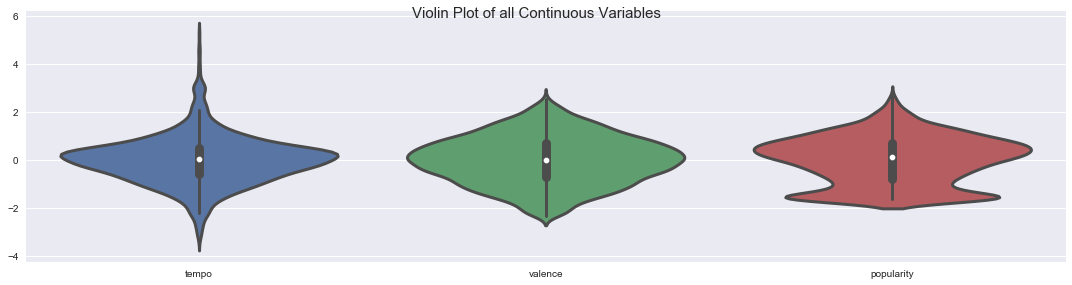

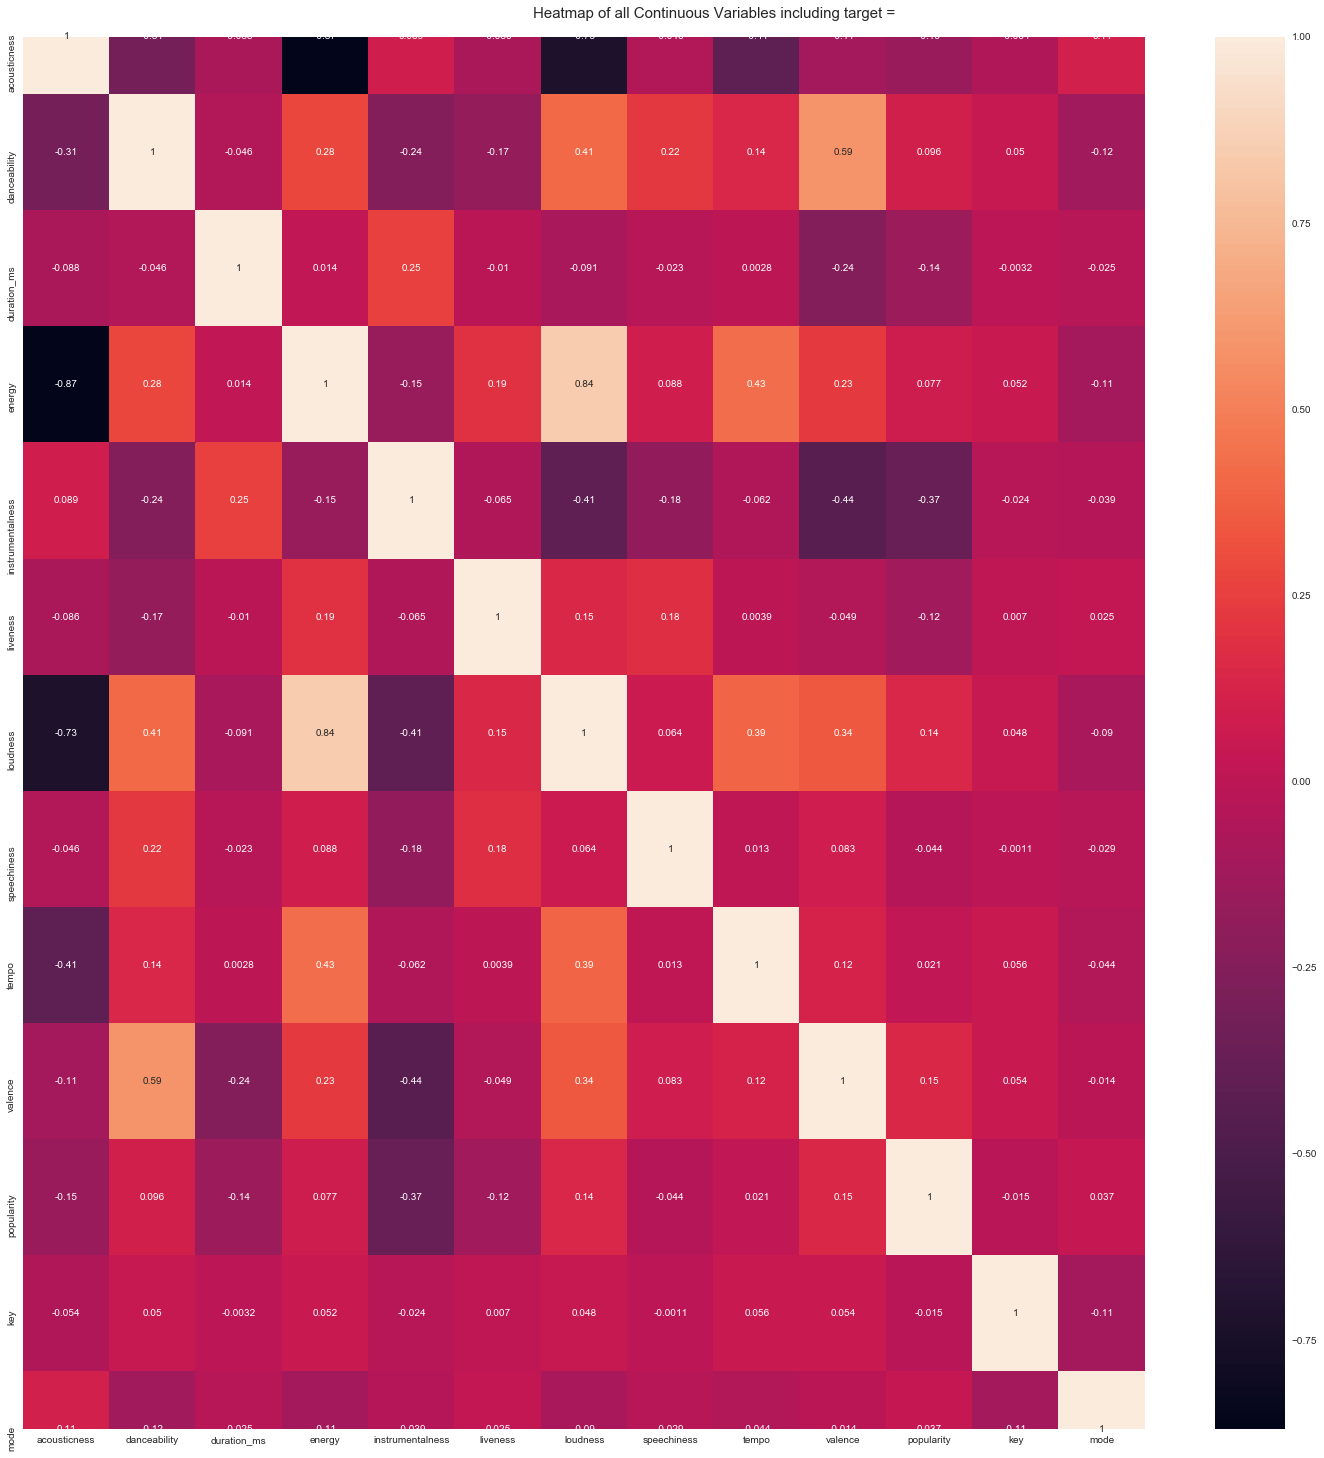

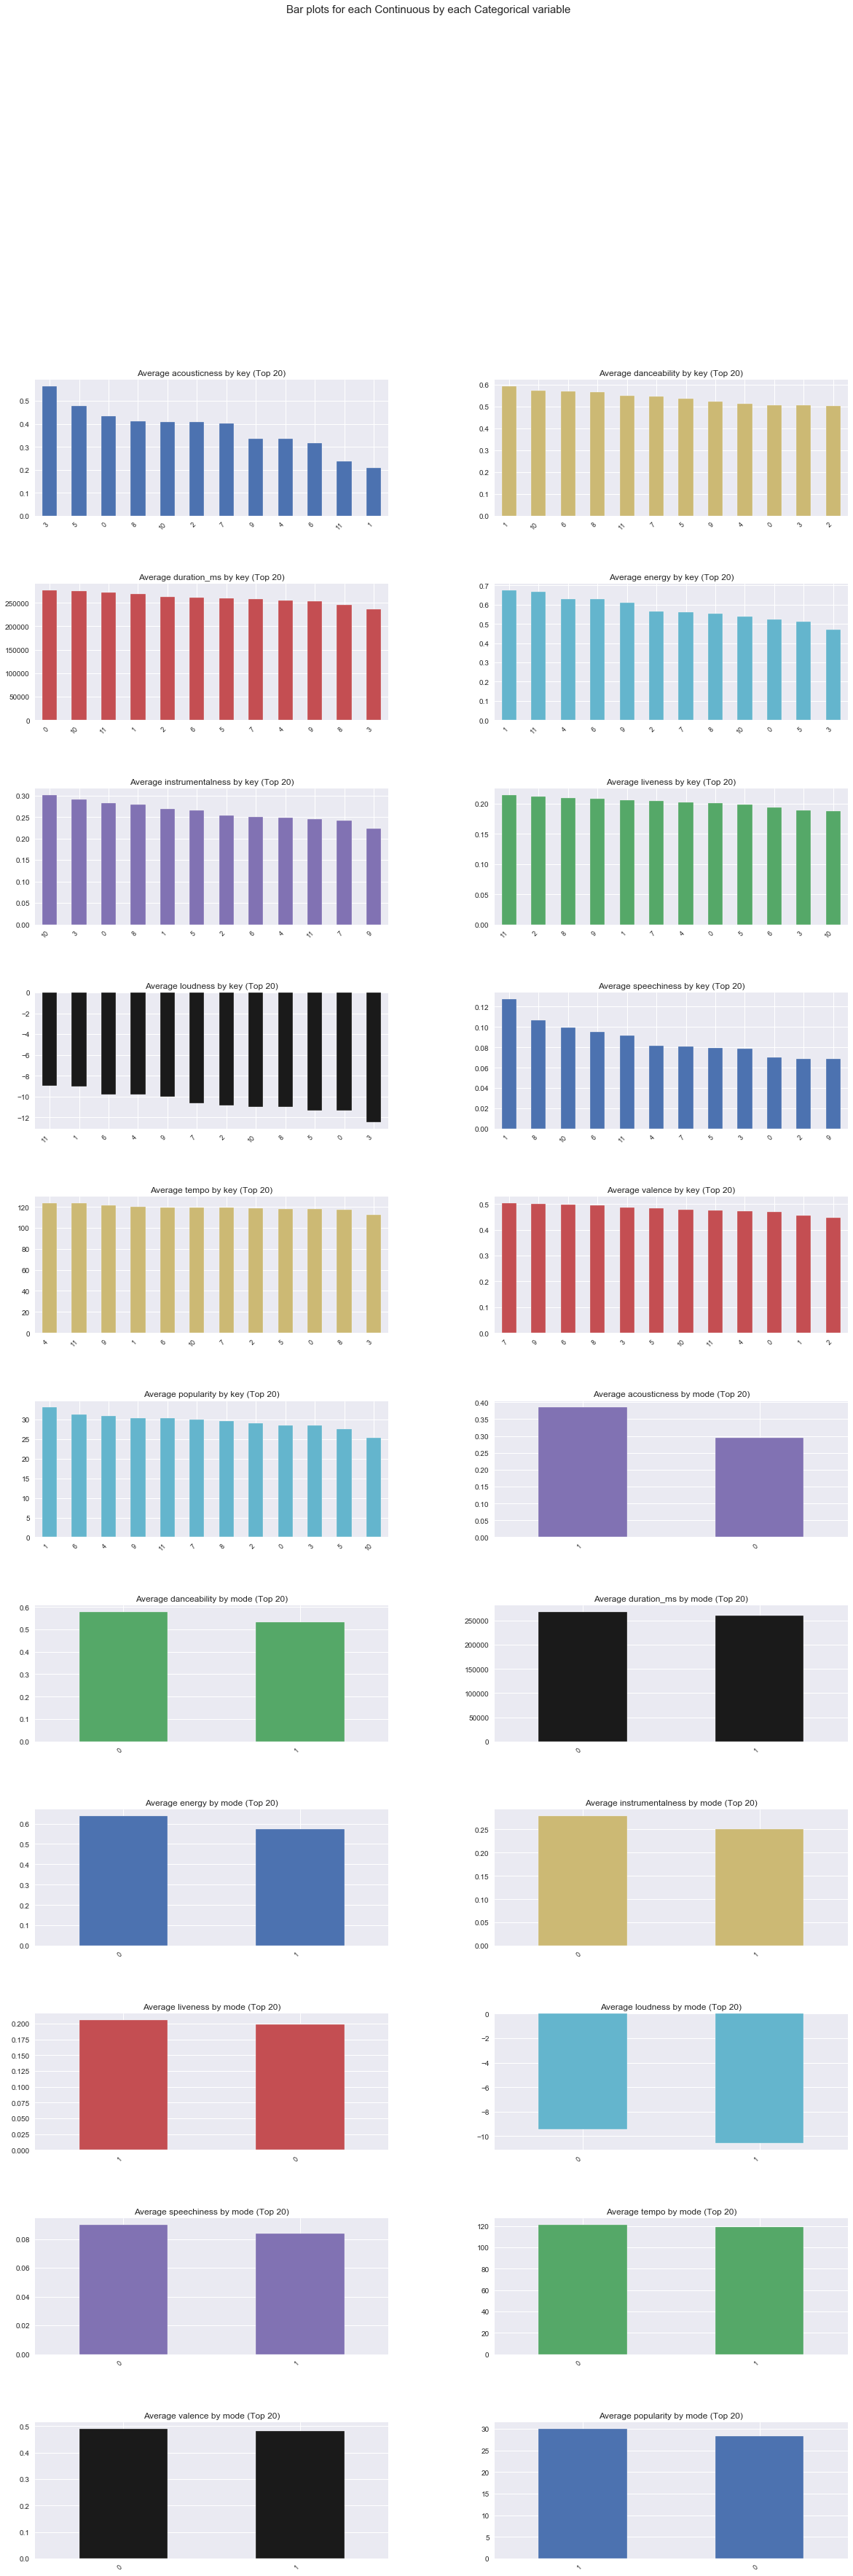

Time to run AutoViz (in seconds) = 84.774

 ###################### VISUALIZATION Completed ########################


In [768]:
AV = auto_viz.AutoViz('./databygenres.csv')

In [748]:
#import plotly
import plotly.express as px #Interactive Plots
labels = [{"word": "Word in Genres", "count": "Word Frequency"}]
df = most_common_words_in_genres_df.sort_values("count")
#print(labels)
#print(values)

fig = px.pie(df, values="count", names="word",title ='Pie Chart of Top 20 Genres')
fig.show()

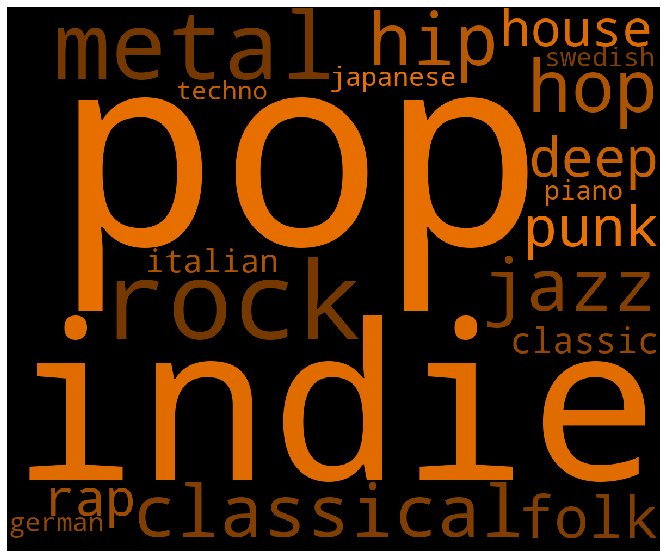

In [749]:
from wordcloud import WordCloud
plt.subplots(figsize = (21,10))

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(background_color='black',
                      width = 1200,
                      height = 1000,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      color_func=random_color_func).generate(" ".join(most_common_words_in_genres_df["word"].tolist()))

plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

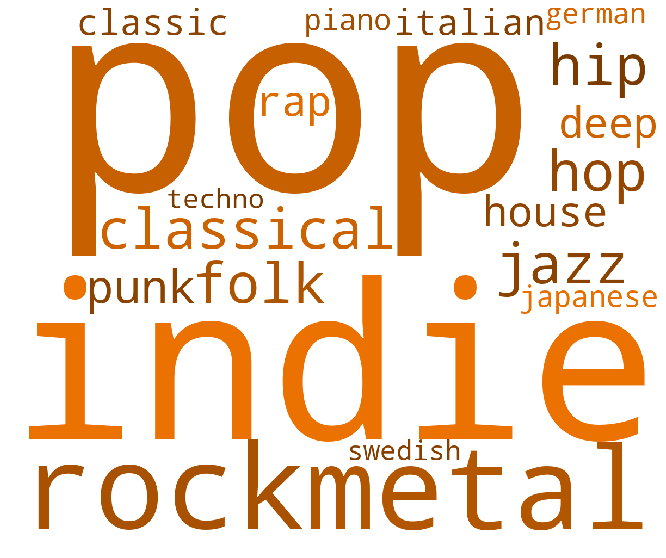

In [750]:
from wordcloud import WordCloud
plt.subplots(figsize = (21,10))

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(background_color='white',
                      width = 1200,
                      height = 1000,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      color_func=random_color_func).generate(" ".join(most_common_words_in_genres_df["word"].tolist()))

plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

In [751]:
data.describe()

acousticness  danceability   duration_ms       energy  \
count   3232.000000   3232.000000  3.232000e+03  3232.000000   
mean       0.368161      0.540810  2.614567e+05     0.583474   
std        0.319697      0.149353  1.255810e+05     0.232931   
min        0.000001      0.063200  3.094600e+04     0.000953   
25%        0.082914      0.450250  2.068497e+05     0.419648   
50%        0.280119      0.550334  2.418786e+05     0.622982   
75%        0.629265      0.645470  2.873741e+05     0.756599   
max        0.996000      0.940000  3.478338e+06     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean           0.254888     0.204010   -10.396208     0.084999   119.707549   
std            0.283907     0.103440     5.024042     0.081157    17.333590   
min            0.000000     0.016500   -40.637000     0.024300    61.364269   
25%            0.013383     0.142317   -12.212486     0.046431   109.480352   
50%            0.128343     0.185618    -9.097583     0.060769   120.142000   
75%            0.443383     0.233807    -7.038634     0.091795   128.253833   
max            0.984000     0.944000    -0.862000     0.956000   211.968000   

           valence   popularity          key         mode  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean      0.483757    29.701618     5.942450     0.819926  
std       0.200382    18.415394     3.342851     0.384309  
min       0.019285     0.000000     0.000000     0.000000  
25%       0.341571    15.190070     3.000000     1.000000  
50%       0.488364    32.181281     7.000000     1.000000  
75%       0.626171    43.069058     9.000000     1.000000  
max       0.997000    79.000000    11.000000     1.000000

In [752]:
data.loc[data['popularity'] < 45.07, 'popularity'] = 0 
data.loc[data['popularity'] >= 45.07, 'popularity'] = 1
data.loc[data['popularity'] == 1]
data["popularity"].value_counts()

0.0    2557
1.0     675
Name: popularity, dtype: int64

In [753]:
from sklearn.model_selection import train_test_split

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']
#feature_drop = ['instrumentalness','acousticness','liveness','duration_ms']
feature_drop = ['instrumentalness']

training = data.sample(frac = 0.9,random_state = 13)
X_train_init = training[feature_names]
X_train = X_train_init.drop(feature_drop,axis=1)
#print(X_train)
y_train = training['popularity']
#X_test = data.drop(training.index)[feature_names]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 13)
#print(y_train)
#print(y_test)

In [754]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

KNN_Model = KNeighborsClassifier(9)
KNN_Model.fit(X_train, y_train)
KNN_pred = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_pred)
print("KNN Accuracy:")
print(KNN_Accuracy)

KNN_AUC = roc_auc_score(y_test, KNN_pred) 
print("KNN AUC:")
print(KNN_AUC)

confusion_mat = confusion_matrix(y_test,KNN_pred)
print("KNN Confusion matrix:")
print(confusion_mat)
print("KNN Classification Report:")
print(classification_report(y_test,KNN_pred))

KNN Accuracy:
0.8178694158075601
KNN AUC:
0.5430479562278725
KNN Confusion matrix:
[[232   7]
 [ 46   6]]
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       239
         1.0       0.46      0.12      0.18        52

    accuracy                           0.82       291
   macro avg       0.65      0.54      0.54       291
weighted avg       0.77      0.82      0.77       291



In [755]:
#sns.heatmap(confusion_mat,annot=True,fmt="d")
#plt.show()

In [756]:
from sklearn.model_selection import cross_val_score

cross_val_KNN = cross_val_score(KNN_Model,X_train,y_train,cv=5)
KNN_CrossValidation_Accuracy = np.sum(cross_val_KNN)/5
print('KNN Cross Validation Average Accuracy : ',np.sum(KNN_CrossValidation_Accuracy))

KNN Cross Validation Average Accuracy :  0.7670018828543488


In [757]:
from sklearn.tree import DecisionTreeClassifier

DT_Model = DecisionTreeClassifier(random_state=1)
DT_Model.fit(X_train, y_train)
DT_pred = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_pred)
print("DT Accuracy:")
print(DT_Accuracy)

DT_AUC = roc_auc_score(y_test, DT_pred)
print("DT AUC:")
print(DT_AUC)

confusion_mat_dt = confusion_matrix(y_test,DT_pred)
print("DT Confusion matrix:")
print(confusion_mat_dt)
print("DT Classification report:")
print(classification_report(y_test,DT_pred))

DT Accuracy:
0.7353951890034365
DT AUC:
0.5755954296749276
DT Confusion matrix:
[[197  42]
 [ 35  17]]
DT Classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       239
         1.0       0.29      0.33      0.31        52

    accuracy                           0.74       291
   macro avg       0.57      0.58      0.57       291
weighted avg       0.75      0.74      0.74       291



In [758]:
cross_val_DT = cross_val_score(DT_Model,X_train,y_train,cv=5)
DT_CrossValidation_Accuracy = np.sum(cross_val_DT)/5
print('Decision Tree Cross Validation Average Accuracy : ',np.sum(DT_CrossValidation_Accuracy))

Decision Tree Cross Validation Average Accuracy :  0.7555339862507845


In [759]:
accuracy_comparison=pd.DataFrame({'Prediction Model':['K-NearestNeighbors','DesicionTreeClassifier'],
                                 'Model Accuracy':[KNN_Accuracy,DT_Accuracy]})
accuracy_comparison.sort_values(by = "Model Accuracy",ascending=False)

Prediction Model  Model Accuracy
0      K-NearestNeighbors        0.817869
1  DesicionTreeClassifier        0.735395

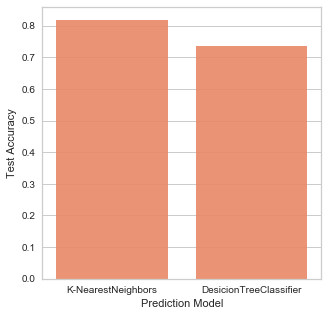

In [760]:
pred_model= list(accuracy_comparison['Prediction Model'].unique())
model_accuracy= list(accuracy_comparison['Model Accuracy'].sort_values(ascending=False))
f1,ax1 = plt.subplots(figsize = (5,5))
sns.barplot(x=pred_model,y=model_accuracy,color='coral',alpha = 0.9)
ax1.set(xlabel='Prediction Model', ylabel='Test Accuracy')
plt.show()

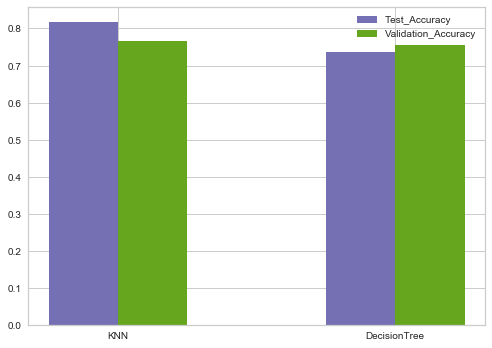

In [761]:
labels = ['KNN', 'DecisionTree']
Test_accuracy = [KNN_Accuracy,DT_Accuracy]
Validation_accuracy = [KNN_CrossValidation_Accuracy,DT_CrossValidation_Accuracy]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 5))
rects1 = ax.bar(x - width/2,Test_accuracy, width, label='Test_Accuracy')
rects2 = ax.bar(x + width/2, Validation_accuracy, width, label='Validation_Accuracy')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [762]:
genre_names_text = " ".join(data['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(20)])
print(most_common_words_in_genres_df['word'])
#print(genre_names_text)

0           pop
1         indie
2          rock
3         metal
4     classical
5           hop
6           hip
7          jazz
8          folk
9          punk
10         deep
11        house
12          rap
13      classic
14      italian
15     japanese
16        piano
17       german
18      swedish
19       techno
Name: word, dtype: object


In [763]:
import plotly.express as px

top10 = ["No"] * data.shape[0]

for i in range(0,10):
    str = most_common_words_in_genres_df['word'][i]
    cnt = 0
    for a in data["genres"]:
        if a.__contains__(str):
            data["genres"].replace(a, str, inplace=True)
            top10[cnt] = a
        cnt = cnt + 1
            
data["Top Genres"] = top10
df_drop_No = data[data["Top Genres"] == "No"]
data = data.drop(df_drop_No.index, axis=0)

data_avg = data.groupby('genres', as_index=False).mean()

fig = px.bar(data_avg, x='genres', y=['valence', 'energy', 'danceability'], color_discrete_map ={'valence': 'lightslategray',
        'energy': 'crimson', 'energy': 'cyan'}, barmode='group')
fig.show()